In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
# Перетворення даних у векторну форму
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [13]:
# зробила менше Dropout, більше нейронів, нові оптимізації для покращення результатів (до цього було приблизно 0.84)
model_3 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)



In [14]:
# Навчання
history = model_3.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

#тест
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print(f"\nТочність на тестових даних: {test_accuracy:.4f}")



Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7292 - loss: 0.7618 - val_accuracy: 0.8509 - val_loss: 0.4132 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8485 - loss: 0.4141 - val_accuracy: 0.8521 - val_loss: 0.4120 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8636 - loss: 0.3732 - val_accuracy: 0.8706 - val_loss: 0.3618 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8737 - loss: 0.3466 - val_accuracy: 0.8733 - val_loss: 0.3521 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8802 - loss: 0.3285 - val_accuracy: 0.8759 - val_loss: 0.3419 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8883 - loss: 0.3100 - val_accuracy: 0.8788 - val_loss: 0.3419 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8876 - loss: 0

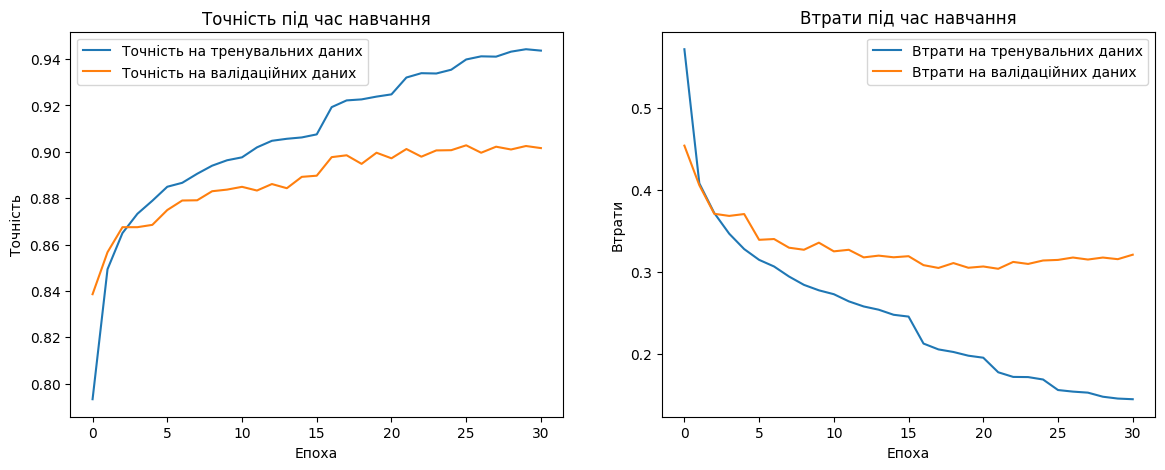

In [ ]:

plt.figure(figsize=(14, 5))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.title('Точність під час навчання')

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.title('Втрати під час навчання')

plt.show()